# Below is how I approach the Movie project
### 1. Frame the Problem and Look at the Big Picture
1. Define the objective in business terms.
    - There are two objectives namely:
        1. Knowing the projected revenue.
        2. Determinig customer interests.
2. How will your solution be used?
    - By companies trying to understand their profits.
    - Movie lovers can get recommendation of movies.
3. What are the current solutions/workarounds (if any)?
    - Can get data from TMDB and Rotten tomatoes (currently use kaggle data).
    - For data analysis and machine learning assume no solutions.
4. How should you frame this problem (supervised/unsupervised,online/offline, etc.)?
    - Supervised and batch learning.
        NB: online learning might be possible. Will experiment at end of project.
5. How should performance be measured?
    - For revenue predictions RSME will be used.
    - For recommender system F1-score will be used.
        NB: For both models will experiment other performance measures. 
6. Is the performance measure aligned with the business objective?
    - For current business needs yes.
    - However, if this is a real world scenario I believe not.
7. What would be the minimum performance needed to reach the business objective?
    - For revenue a score of 94% is acceptable. 
    - For recommender system generating high recall score is preferable. 
8. What are comparable problems? Can you reuse experience or tools?
    - Assume none exist.
9. Is human expertise available?
    - Assume no.
10. How would you solve the problem manually?
    - For revenue talking to people in movie industry.
    - For recommendor asking random people.
11. List the assumptions you (or others) have made so far.
    - None identified at this point. 
12. Verify assumptions if possible.
    - None to verify. 

In [130]:
# Deleted all the previous code due to data.
# However, decided on using the same data for now.
# Fetching my own data a bit hard and will deviate me from main goal.
# Below is the python package should I want to use my own data.
# https://github.com/celiao/tmdbsimple/blob/master/tmdbsimple/movies.py

In [131]:
# EDA libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [132]:
# setting column view maximum.
pd.set_option("display.max_colwidth", None)

In [133]:
# load data.
movies=pd.read_csv("../../../Data/archive/movies_metadata.csv", low_memory=False)

In [134]:
# seperate data into train and test.
# this is to avoid data snooping.
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(movies, test_size=0.2, random_state=34)

In [135]:
# use train_set for EDA and ML.
movies = train_set

In [136]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36372 entries, 36393 to 11681
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  36372 non-null  object 
 1   belongs_to_collection  3600 non-null   object 
 2   budget                 36372 non-null  object 
 3   genres                 36372 non-null  object 
 4   homepage               6239 non-null   object 
 5   id                     36372 non-null  object 
 6   imdb_id                36357 non-null  object 
 7   original_language      36361 non-null  object 
 8   original_title         36372 non-null  object 
 9   overview               35620 non-null  object 
 10  popularity             36368 non-null  object 
 11  poster_path            36054 non-null  object 
 12  production_companies   36370 non-null  object 
 13  production_countries   36370 non-null  object 
 14  release_date           36300 non-null  object 
 15  rev

In [137]:
movies.describe()

,revenue,runtime,vote_average,vote_count
count,3.636700e+04,36159.000000,36367.000000,36367.00000
mean,1.112601e+07,94.250449,5.615682,109.84299
std,6.324902e+07,38.149114,1.921733,492.20087
min,0.000000e+00,0.000000,0.000000,0.00000
25%,0.000000e+00,85.000000,5.000000,3.00000
50%,0.000000e+00,95.000000,6.000000,10.00000
75%,0.000000e+00,107.000000,6.800000,34.00000
max,1.845034e+09,1140.000000,10.000000,14075.00000


In [138]:
movies.describe(include='object')

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,spoken_languages,status,tagline,title,video
count,36372,3600,36372,36372,6239,36372,36357,36361,36372,35620,36368,36054,36370,36370,36300,36367,36296,16309,36367,36367
unique,5,1591,1036,3580,6155,36350,36333,85,34959,35461,35168,36014,18628,2022,15474,1644,6,16224,34210,2
top,False,"{'id': 421566, 'name': 'Totò Collection', 'poster_path': '/4ayJsjC3djGwU9eCWUokdBWvdLC.jpg', 'backdrop_path': '/jaUuprubvAxXLAY5hUfrNjxccUh.jpg'}",0,"[{'id': 18, 'name': 'Drama'}]",http://www.georgecarlin.com,141971,tt1180333,en,Hamlet,No overview found.,0.0,/2kslZXOaW0HmnGuVPCnQlCdXFR9.jpg,[],"[{'iso_3166_1': 'US', 'name': 'United States of America'}]",2008-01-01,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Based on a true story.,Hamlet,False
freq,36360,22,29348,3984,11,3,3,25791,8,106,60,4,9492,14266,115,17842,35997,5,9,36285


In [139]:
# function to count dtypes per column.
def count_dtypes(data):
    return type(data)

In [140]:
# function to retrieve columns names with differing data types.
# generates the count of data types in those columns.
def multi_dtypes_columns(data):
    data_arr = []
    for col in data.columns:
        data_types = data[col].apply(count_dtypes)
        unique_data_types = set(data_types)
        if len(unique_data_types) > 1:
            val = (col, unique_data_types)
            data_arr.append(val)
    return np.array(data_arr)
cols = multi_dtypes_columns(movies)

In [141]:
arr = []
for key, value in zip(movies.iloc[0].keys(), movies.iloc[0].values):
    arr.append([key, value])
arr = np.array(arr)
arr


array([['adult', 'False'],
       ['belongs_to_collection', 'nan'],
       ['budget', '0'],
       ['genres',
        "[{'id': 27, 'name': 'Horror'}, {'id': 53, 'name': 'Thriller'}]"],
       ['homepage', 'nan'],
       ['id', '109174'],
       ['imdb_id', 'tt0203139'],
       ['original_language', 'fr'],
       ['original_title', 'Silent Predators'],
       ['overview',
        "In 1979, a delivery truck makes its way up a lonely southern California highway in a storm, bound for the San Diego Zoo with a deadly tropical rattlesnake as cargo. When the truck suffers a blowout, the driver loses control and hits a tree, shattering the snake's aquarium in the back and the window separating the snake from the driver. The snake slithers into the front of the truck, kills the driver with its bite and then moves off into the forest. Flash forward to 1999. The small southern California town of San Vicente has grown from 6,000 to 30,000, and the rattler, which escaped nearby years ago, has bred. 

In [142]:
def budget_convert(data):
    try:
        if type(float(data)) == float:
            return data
    except:
        return 0.0
    
movies['budget'] = movies['budget'].apply(budget_convert)


In [143]:
def id_convert(data):
    try:
        if type(int(data)) == int:
            return data
    except:
        return 0.0
movies['id'] = movies['id'].apply(id_convert)

In [144]:
def popularity_convert(data):
    try:
        if type(float(data)) == float:
            return data
    except:
        return 0.0
movies['popularity'] = movies['popularity'].apply(popularity_convert)

In [145]:
def date_convert(data):
    try:
        if len(data) < 5:
            return pd.to_datetime('2024-01-01')
        else:
            return data
    except:
        return pd.to_datetime('2024-01-01')
movies['release_date'] = movies['release_date'].apply(date_convert)

In [146]:
movies = movies.astype({
    'adult': bool,
    'belongs_to_collection': str,
    'budget': float,
    'genres': object,
    'homepage': str,
    'id': int,
    'imdb_id': str,
    'original_language': str,
    'original_title': str,
    'overview': str,
    'popularity': float,
    'poster_path': str,
    'production_companies': str,
    'production_countries': object,
    'release_date': 'datetime64[ns]',
    'revenue': float,
    'runtime': float,
    'spoken_languages': object,
    'status': str,
    'tagline': str,
    'title': str,
    'video': bool,
    'vote_average': float,
    'vote_count': float

})

In [147]:
# Iterating through the DataFrame to find missing value locations
for row_index, row in movies.iterrows():
    for col_index, value in row.items():
        if pd.isnull(value):
            print(f"Missing value at row {row_index}, column {col_index}")

Missing value at row 18038, column runtime
Missing value at row 21102, column runtime
Missing value at row 41399, column runtime
Missing value at row 35491, column runtime
Missing value at row 44120, column runtime
Missing value at row 37209, column runtime
Missing value at row 40886, column runtime
Missing value at row 41372, column runtime
Missing value at row 15733, column runtime
Missing value at row 28800, column runtime
Missing value at row 25561, column runtime
Missing value at row 43470, column runtime
Missing value at row 37404, column runtime
Missing value at row 802, column runtime
Missing value at row 39851, column runtime
Missing value at row 37450, column runtime
Missing value at row 41067, column runtime
Missing value at row 18572, column runtime
Missing value at row 39677, column runtime
Missing value at row 34702, column runtime
Missing value at row 644, column runtime
Missing value at row 31556, column runtime
Missing value at row 29300, column runtime
Missing value a

In [148]:
# filling null with computed mean
runtime_mean = np.mean(movies['runtime'])
movies['runtime'] = movies['runtime'].fillna(runtime_mean)

In [149]:
from sklearn.impute import SimpleImputer
 
 
# Creating a SimpleImputer object with the strategy='mean'
# You can also use 'median', 'most_frequent', or a constant value
imputer = SimpleImputer(strategy='most_frequent')  
 
# Fitting and transforming the imputer on the DataFrame
imputed_data = imputer.fit_transform(movies)
 
# Converting the imputed data array back to a DataFrame
movies = pd.DataFrame(imputed_data, columns=movies.columns)
 

In [150]:
# 11 duplicates dropped
movies = movies.drop_duplicates()

In [151]:
movies = movies.astype({
    'adult': bool,
    'belongs_to_collection': str,
    'budget': float,
    'genres': object,
    'homepage': str,
    'id': int,
    'imdb_id': str,
    'original_language': str,
    'original_title': str,
    'overview': str,
    'popularity': float,
    'poster_path': str,
    'production_companies': str,
    'production_countries': object,
    'release_date': 'datetime64[ns]',
    'revenue': float,
    'runtime': float,
    'spoken_languages': object,
    'status': str,
    'tagline': str,
    'title': str,
    'video': bool,
    'vote_average': float,
    'vote_count': float

})

In [152]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36361 entries, 0 to 36371
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   adult                  36361 non-null  bool          
 1   belongs_to_collection  36361 non-null  object        
 2   budget                 36361 non-null  float64       
 3   genres                 36361 non-null  object        
 4   homepage               36361 non-null  object        
 5   id                     36361 non-null  int32         
 6   imdb_id                36361 non-null  object        
 7   original_language      36361 non-null  object        
 8   original_title         36361 non-null  object        
 9   overview               36361 non-null  object        
 10  popularity             36361 non-null  float64       
 11  poster_path            36361 non-null  object        
 12  production_companies   36361 non-null  object        
 13  produc

In [153]:
# plots of various kinds

In [154]:
attributes = ["budget", "popularity", "revenue", "runtime", "vote_average", "vote_count"]
corr_matrix = movies[attributes].corr()
corr_matrix["revenue"].sort_values(ascending=False)


revenue         1.000000
vote_count      0.816421
budget          0.781303
popularity      0.505728
runtime         0.104957
vote_average    0.085986
Name: revenue, dtype: float64

<Axes: xlabel='vote_count', ylabel='revenue'>

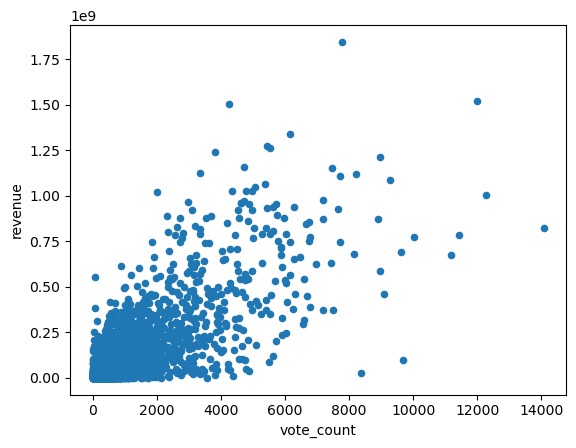

In [155]:
movies.plot(kind="scatter", x="vote_count", y="revenue")

<Axes: xlabel='vote_count', ylabel='revenue'>

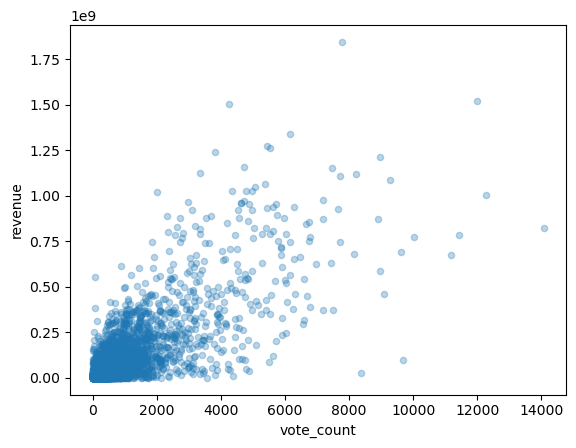

In [156]:
movies.plot(kind="scatter", x="vote_count", y="revenue", alpha=0.3)

<Axes: xlabel='budget', ylabel='revenue'>

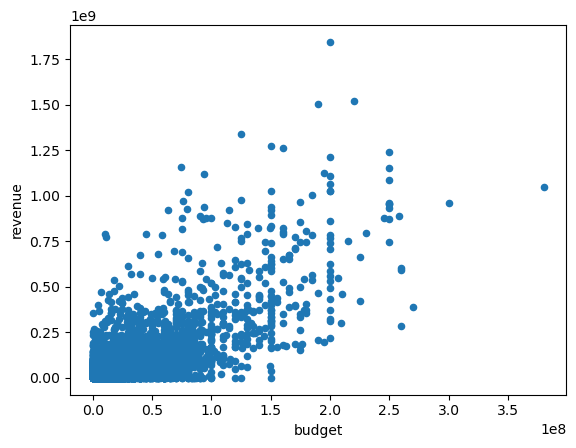

In [157]:
movies.plot(kind="scatter", x="budget", y="revenue")

<Axes: xlabel='budget', ylabel='revenue'>

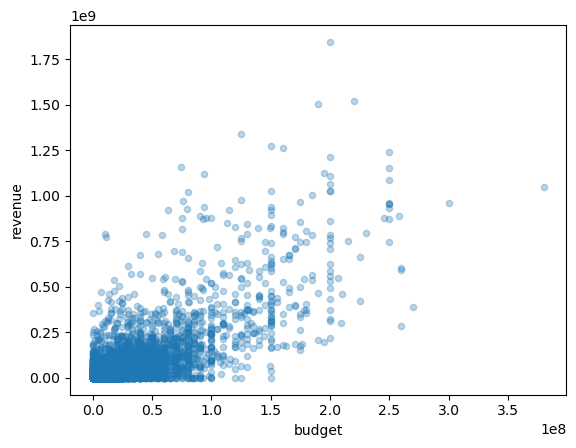

In [158]:
movies.plot(kind="scatter", x="budget", y="revenue", alpha=0.3)

<Axes: xlabel='popularity', ylabel='revenue'>

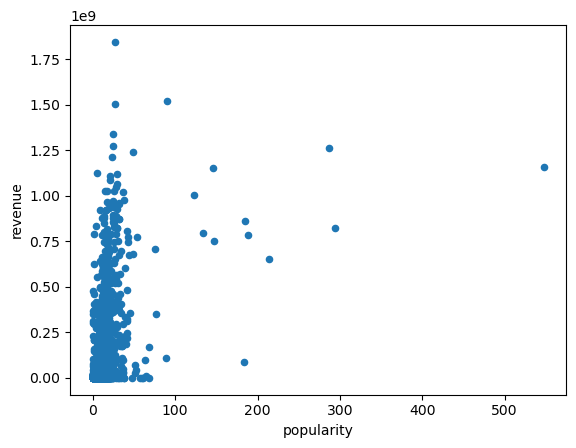

In [159]:
movies.plot(kind="scatter", x="popularity", y="revenue")

<Axes: xlabel='popularity', ylabel='revenue'>

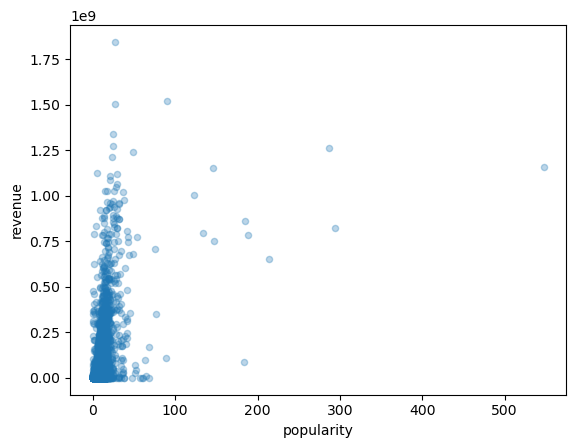

In [160]:
movies.plot(kind="scatter", x="popularity", y="revenue", alpha=0.3)

<Axes: xlabel='runtime', ylabel='revenue'>

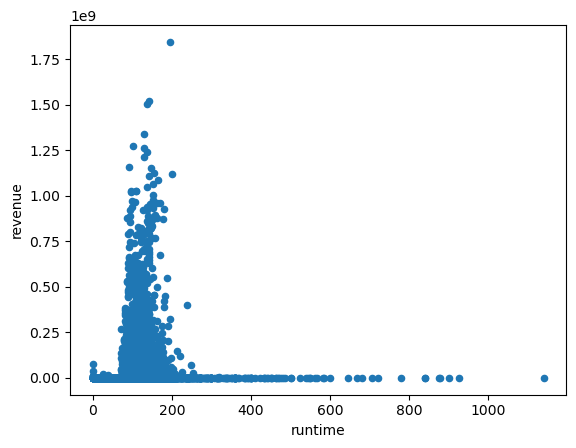

In [161]:
movies.plot(kind="scatter", x="runtime", y="revenue")

<Axes: xlabel='runtime', ylabel='revenue'>

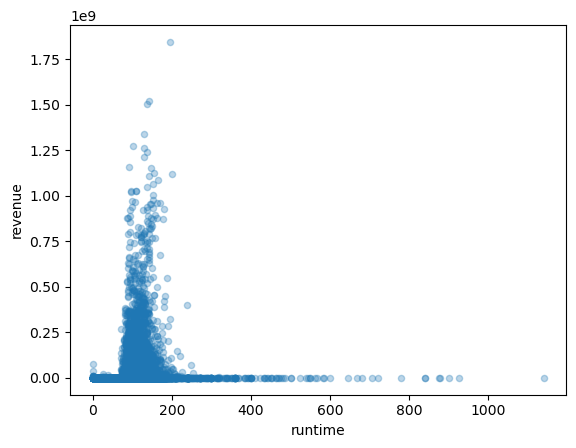

In [162]:
movies.plot(kind="scatter", x="runtime", y="revenue", alpha=0.3)

<Axes: xlabel='vote_average', ylabel='revenue'>

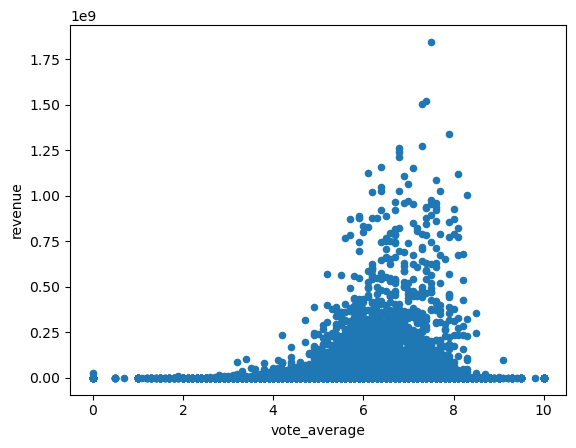

In [163]:
movies.plot(kind="scatter", x="vote_average", y="revenue")

<Axes: xlabel='vote_average', ylabel='revenue'>

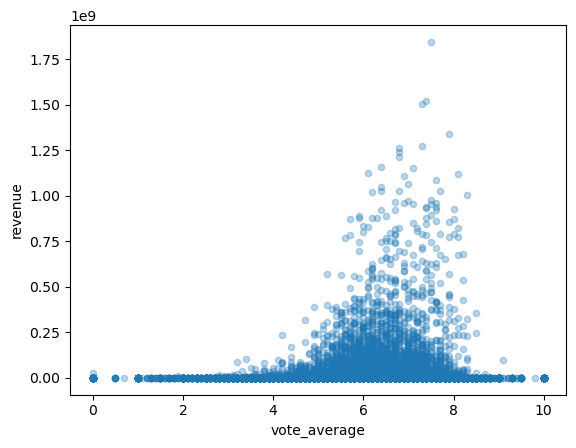

In [164]:
movies.plot(kind="scatter", x="vote_average", y="revenue", alpha=0.3)

In [165]:
from pandas.plotting import scatter_matrix

In [166]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36361 entries, 0 to 36371
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   adult                  36361 non-null  bool          
 1   belongs_to_collection  36361 non-null  object        
 2   budget                 36361 non-null  float64       
 3   genres                 36361 non-null  object        
 4   homepage               36361 non-null  object        
 5   id                     36361 non-null  int32         
 6   imdb_id                36361 non-null  object        
 7   original_language      36361 non-null  object        
 8   original_title         36361 non-null  object        
 9   overview               36361 non-null  object        
 10  popularity             36361 non-null  float64       
 11  poster_path            36361 non-null  object        
 12  production_companies   36361 non-null  object        
 13  produc

array([[<Axes: xlabel='budget', ylabel='budget'>,
        <Axes: xlabel='popularity', ylabel='budget'>,
        <Axes: xlabel='revenue', ylabel='budget'>,
        <Axes: xlabel='vote_average', ylabel='budget'>,
        <Axes: xlabel='vote_count', ylabel='budget'>],
       [<Axes: xlabel='budget', ylabel='popularity'>,
        <Axes: xlabel='popularity', ylabel='popularity'>,
        <Axes: xlabel='revenue', ylabel='popularity'>,
        <Axes: xlabel='vote_average', ylabel='popularity'>,
        <Axes: xlabel='vote_count', ylabel='popularity'>],
       [<Axes: xlabel='budget', ylabel='revenue'>,
        <Axes: xlabel='popularity', ylabel='revenue'>,
        <Axes: xlabel='revenue', ylabel='revenue'>,
        <Axes: xlabel='vote_average', ylabel='revenue'>,
        <Axes: xlabel='vote_count', ylabel='revenue'>],
       [<Axes: xlabel='budget', ylabel='vote_average'>,
        <Axes: xlabel='popularity', ylabel='vote_average'>,
        <Axes: xlabel='revenue', ylabel='vote_average'>,
    

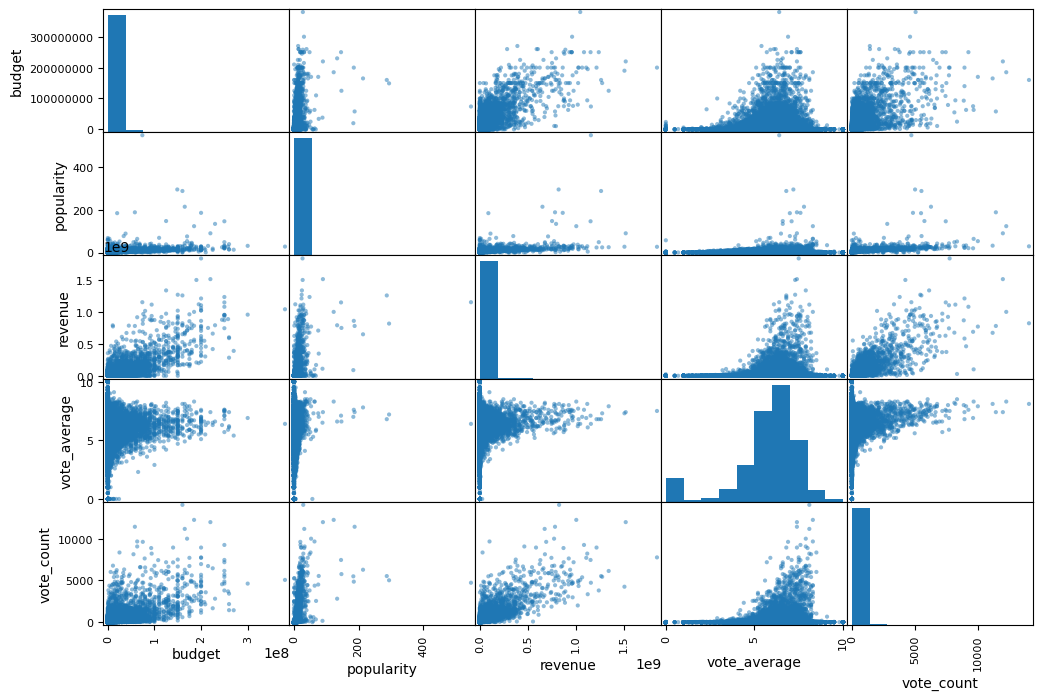

In [167]:
num_attributes = ['budget','popularity','revenue','vote_average', 'vote_count']
scatter_matrix(movies[num_attributes], figsize=(12,8))

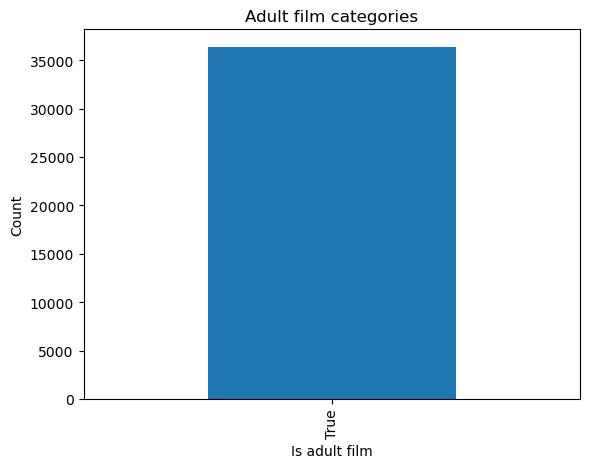

In [168]:
adult_films = movies['adult'].value_counts()

adult_films.plot(kind='bar',
                 title='Adult film categories',
                 xlabel='Is adult film',
                 ylabel='Count')
plt.show()

In [169]:
def edit_genre(string):
    name = string.split('name')
    full_name = ''
    for i in range(1, len(name)):
        genre = name[i][2:].split('}')[0]
        full_name += genre + '_'
    return full_name

movies['genres'] = movies['genres'].apply(edit_genre)


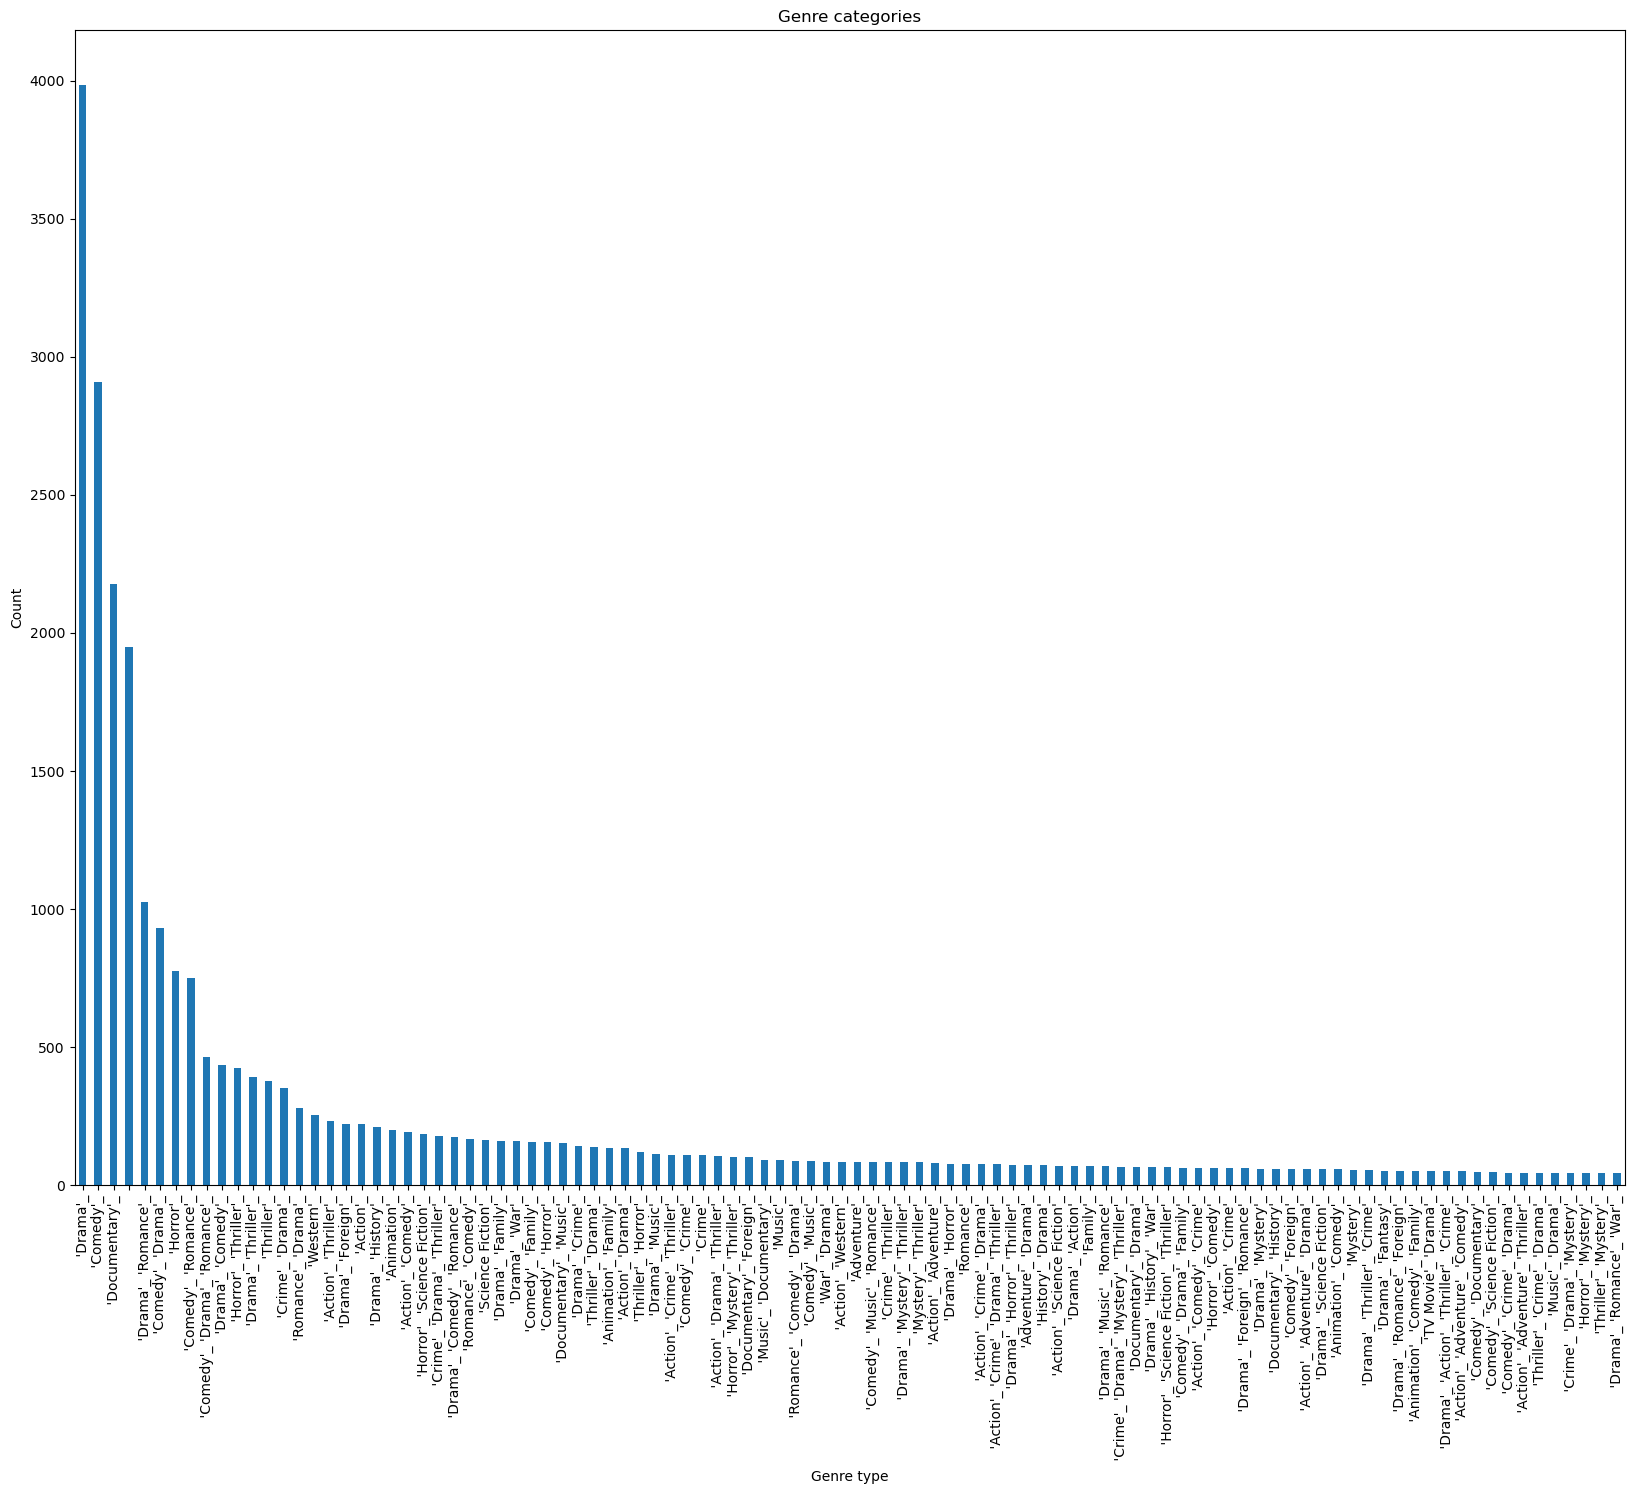

In [170]:
genres_films = movies['genres'].value_counts()[:100]
genres_films.plot(kind='bar',
                 title='Genre categories',
                 xlabel='Genre type',
                 ylabel='Count',
                 figsize=(20,15))
plt.show()

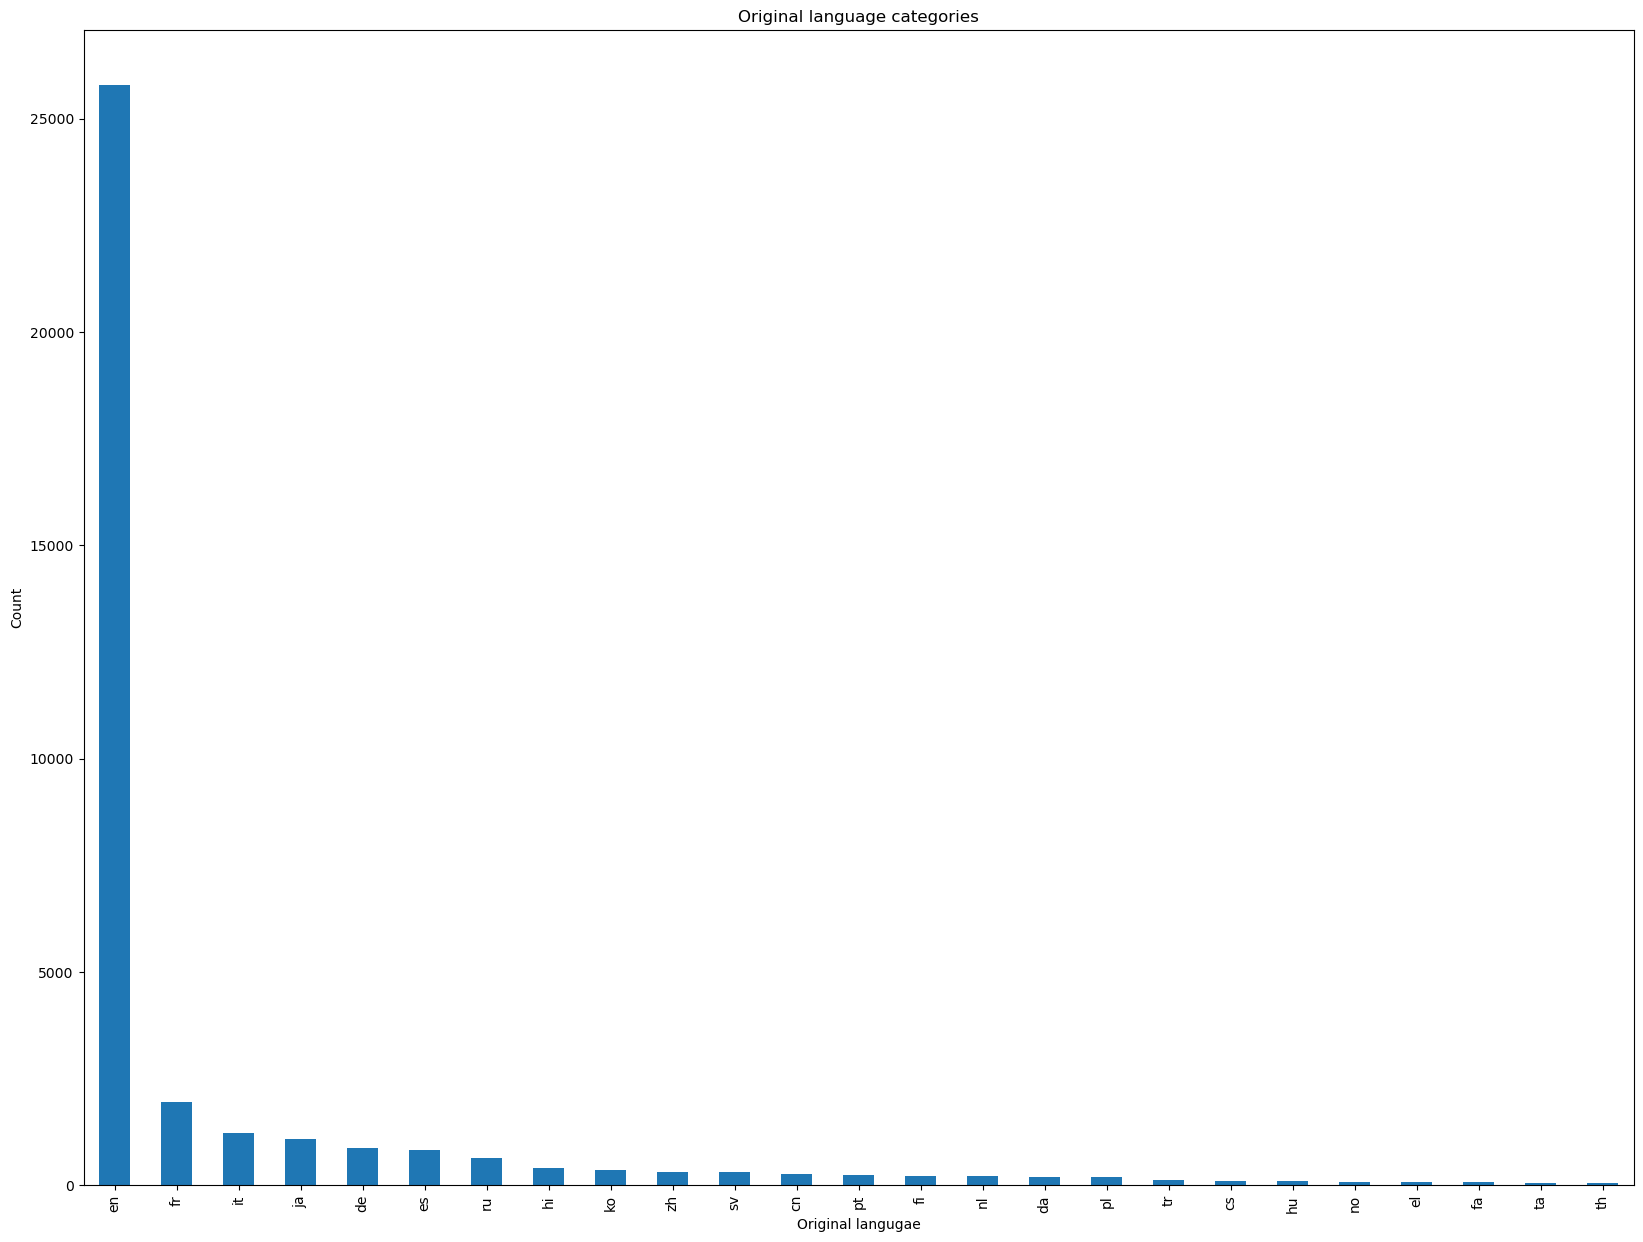

In [171]:
original_language = movies['original_language'].value_counts()[:25]
original_language.plot(kind='bar',
                 title='Original language categories',
                 xlabel='Original langugae',
                 ylabel='Count',
                 figsize=(20,15))
plt.show()


In [172]:
def edit_production_companies(string):
    name = string.split('name')
    full_name = ''
    for i in range(1, len(name)):
        company = name[i][3:].split(",")[0]
        full_name += company + '_'
    return full_name

movies['production_companies'] = movies['production_companies'].apply(edit_production_companies)

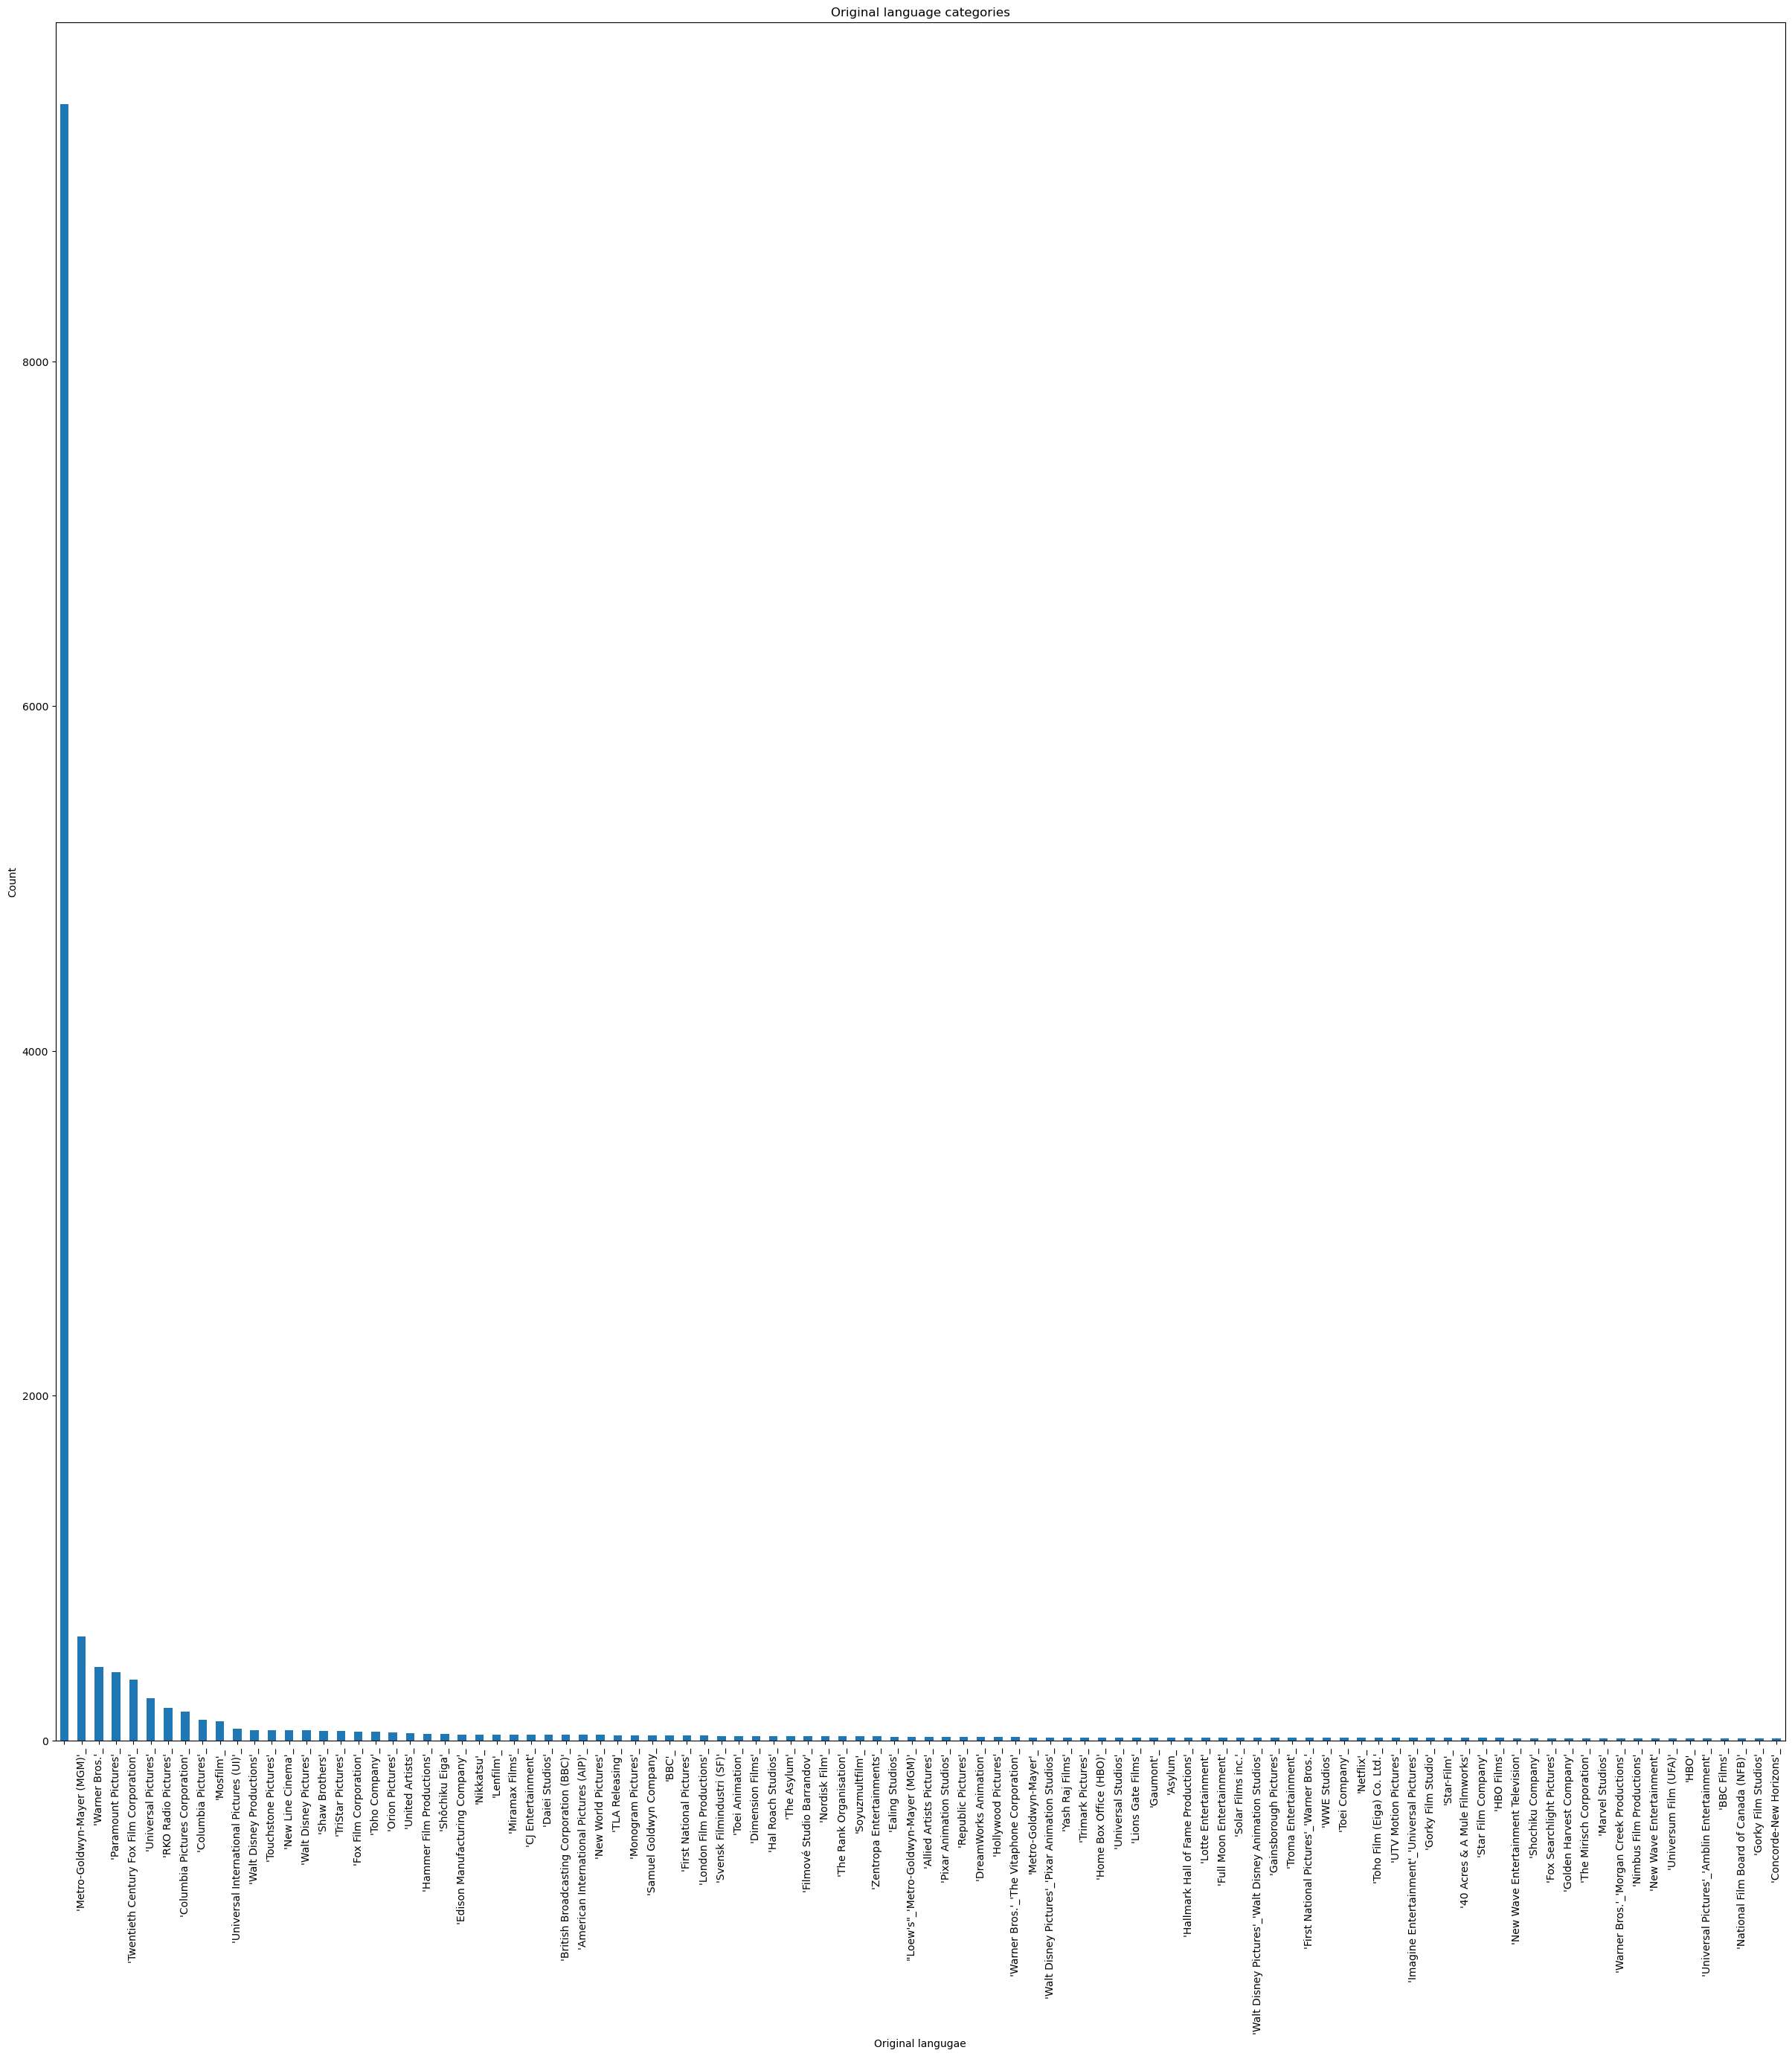

In [173]:
original_language =movies['production_companies'].value_counts()[:100]
original_language.plot(kind='bar',
                 title='Original language categories',
                 xlabel='Original langugae',
                 ylabel='Count',
                 figsize=(30,30))
plt.show()

In [174]:
def edit_production_countries(string):
    name = string.split('name')
    full_name = ''
    for i in range(1, len(name)):
        genre = name[i][2:].split('}')[0]
        full_name += genre + '_'
    return full_name

movies['production_countries'] = movies['production_countries'].apply(edit_production_countries)


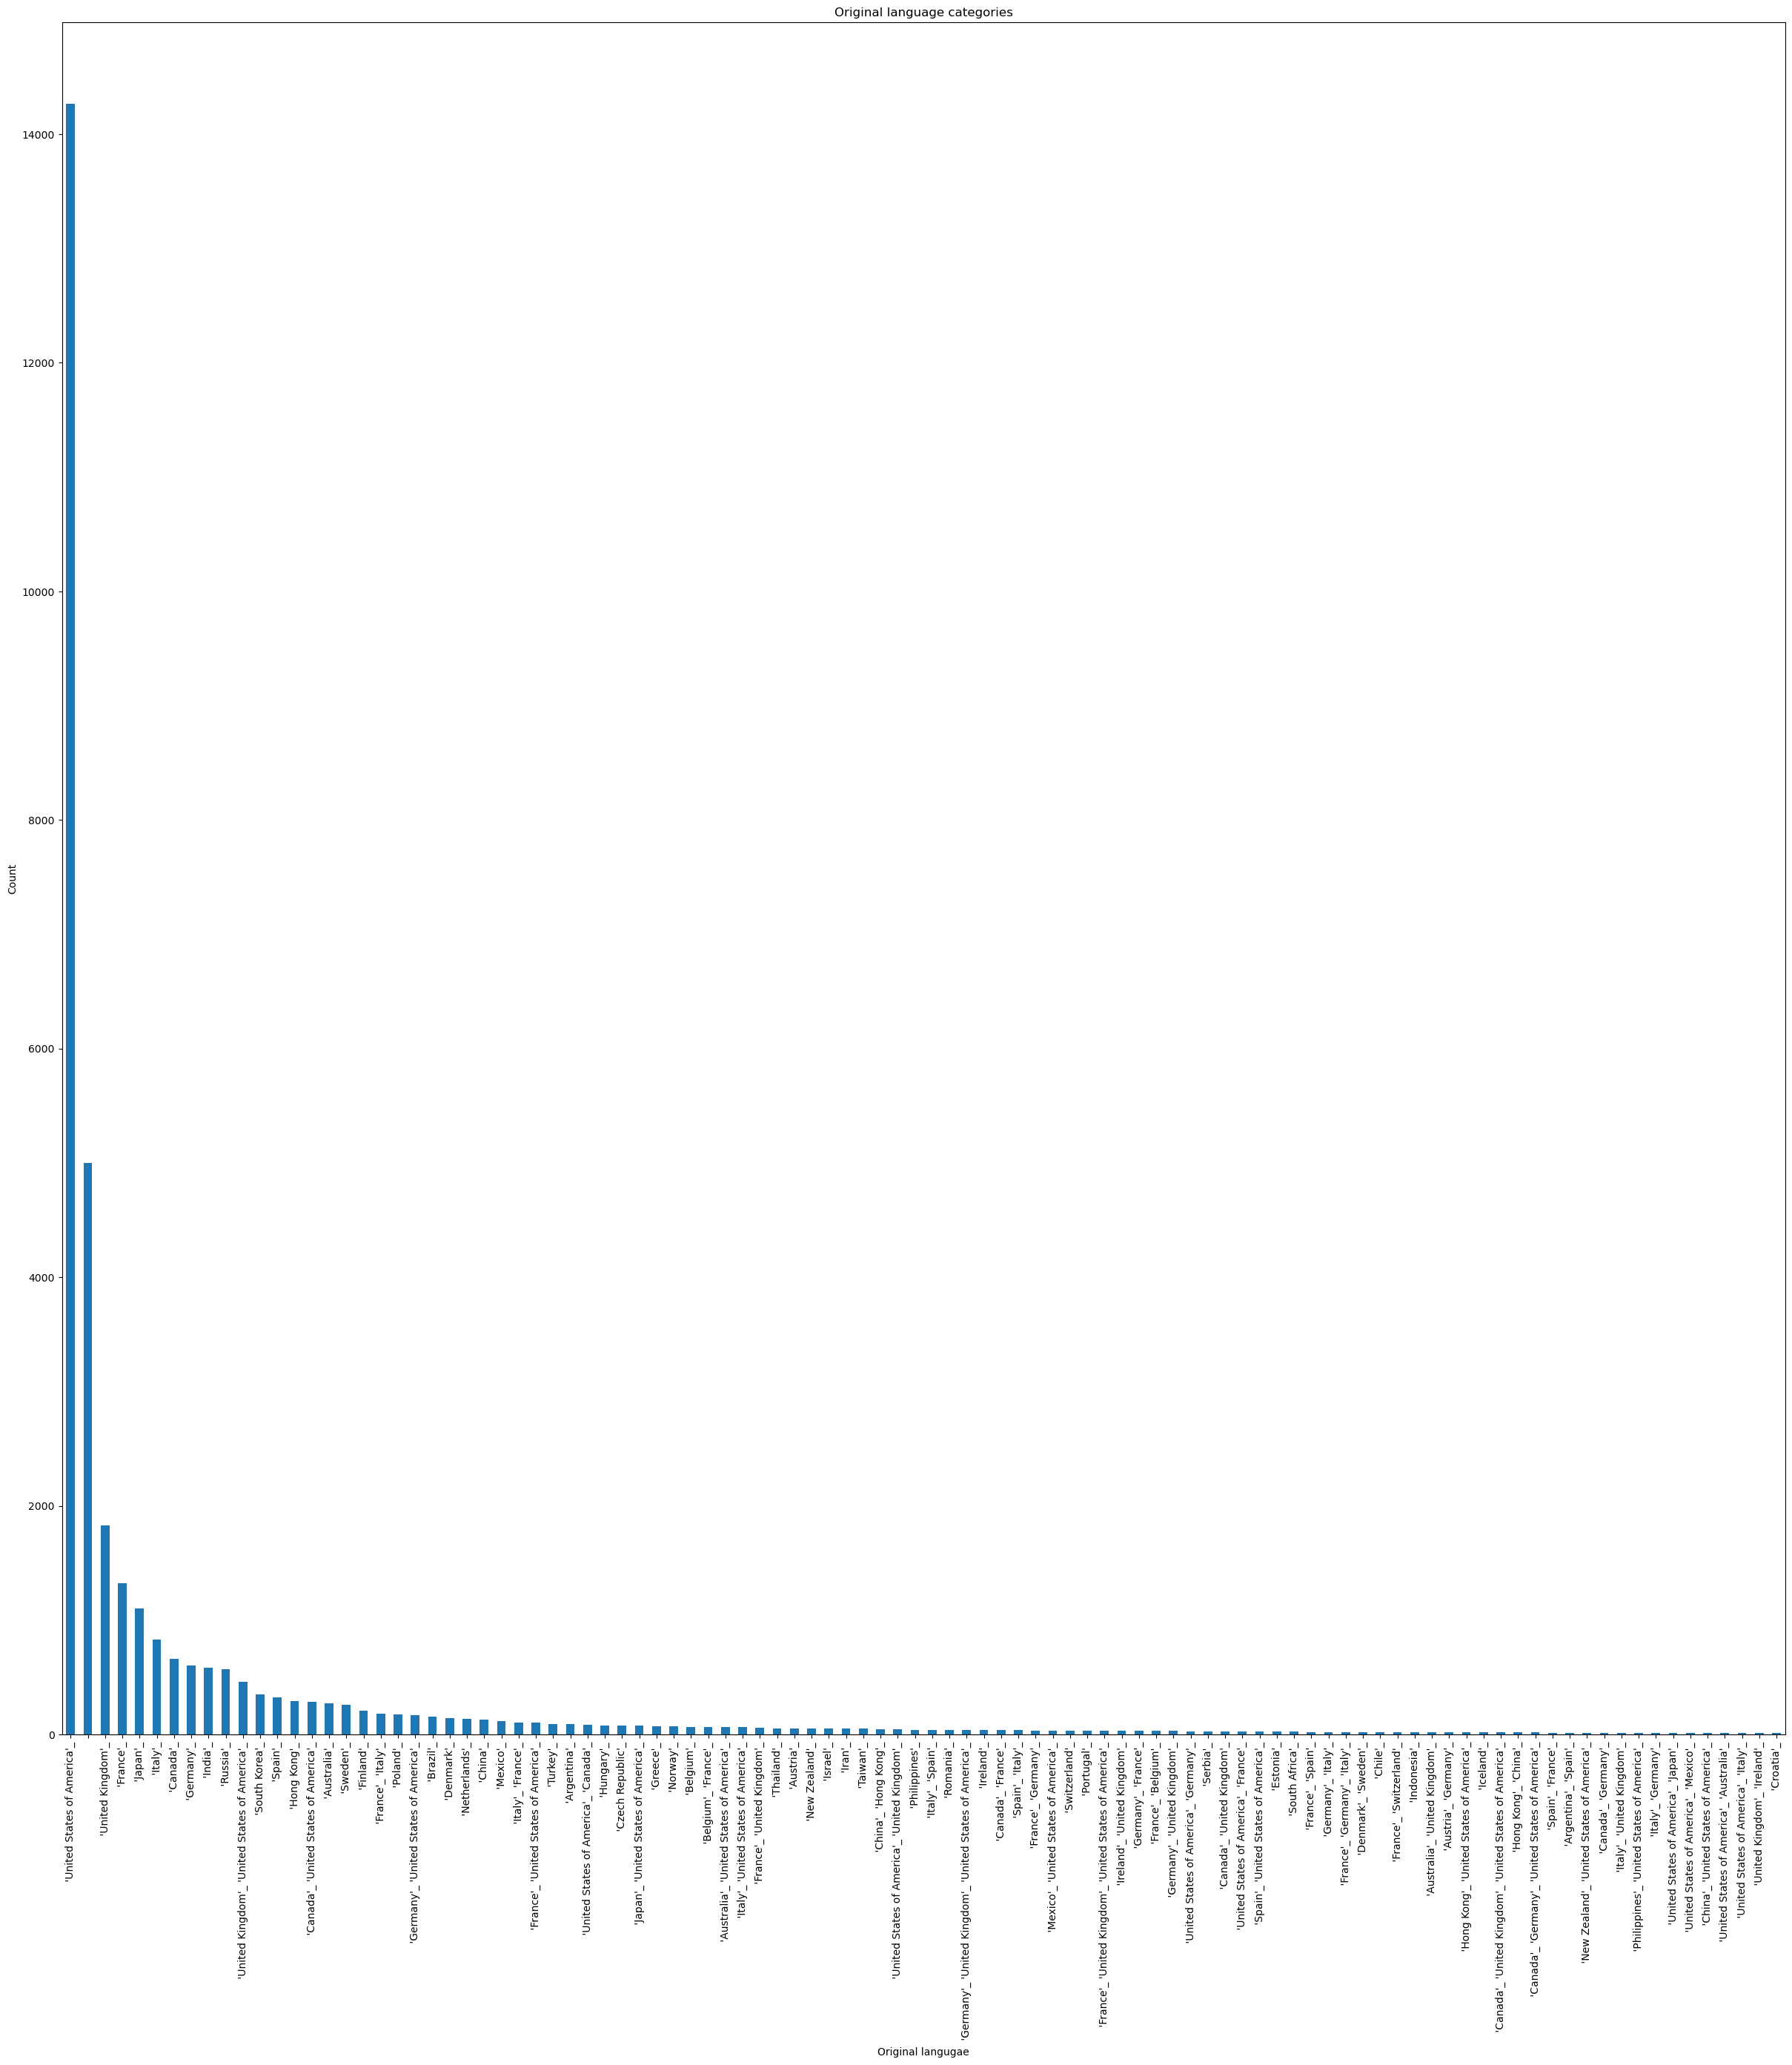

In [175]:
original_language =movies['production_countries'].value_counts()[:100]
original_language.plot(kind='bar',
                 title='Original language categories',
                 xlabel='Original langugae',
                 ylabel='Count',
                 figsize=(30,30))
plt.show()

In [176]:
def edit_spoken_langugage(string):
    name = string.split('name')
    full_name = ''
    for i in range(1, len(name)):
        genre = name[i][2:].split('}')[0]
        full_name += genre + '_'
    return full_name

movies['spoken_languages'] = movies['spoken_languages'].apply(edit_spoken_langugage)

In [177]:
movies['spoken_languages'].value_counts()

spoken_languages
 'English'_                                                                                                                                        17844
                                                                                                                                                    3078
 'Français'_                                                                                                                                        1502
 '日本語'_                                                                                                                                             1046
 'Italiano'_                                                                                                                                         986
                                                                                                                                                   ...  
 'Pусский'_ 'ελληνικά'_ 'English'_ 'Español'_ 'Français'_ 'Italia

c:\Users\Admin\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 26085 (\N{CJK UNIFIED IDEOGRAPH-65E5}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Admin\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 26412 (\N{CJK UNIFIED IDEOGRAPH-672C}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Admin\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 35486 (\N{CJK UNIFIED IDEOGRAPH-8A9E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Admin\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 2361 (\N{DEVANAGARI LETTER HA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Admin\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Matplotlib currently does not support Devanagari natively.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\A

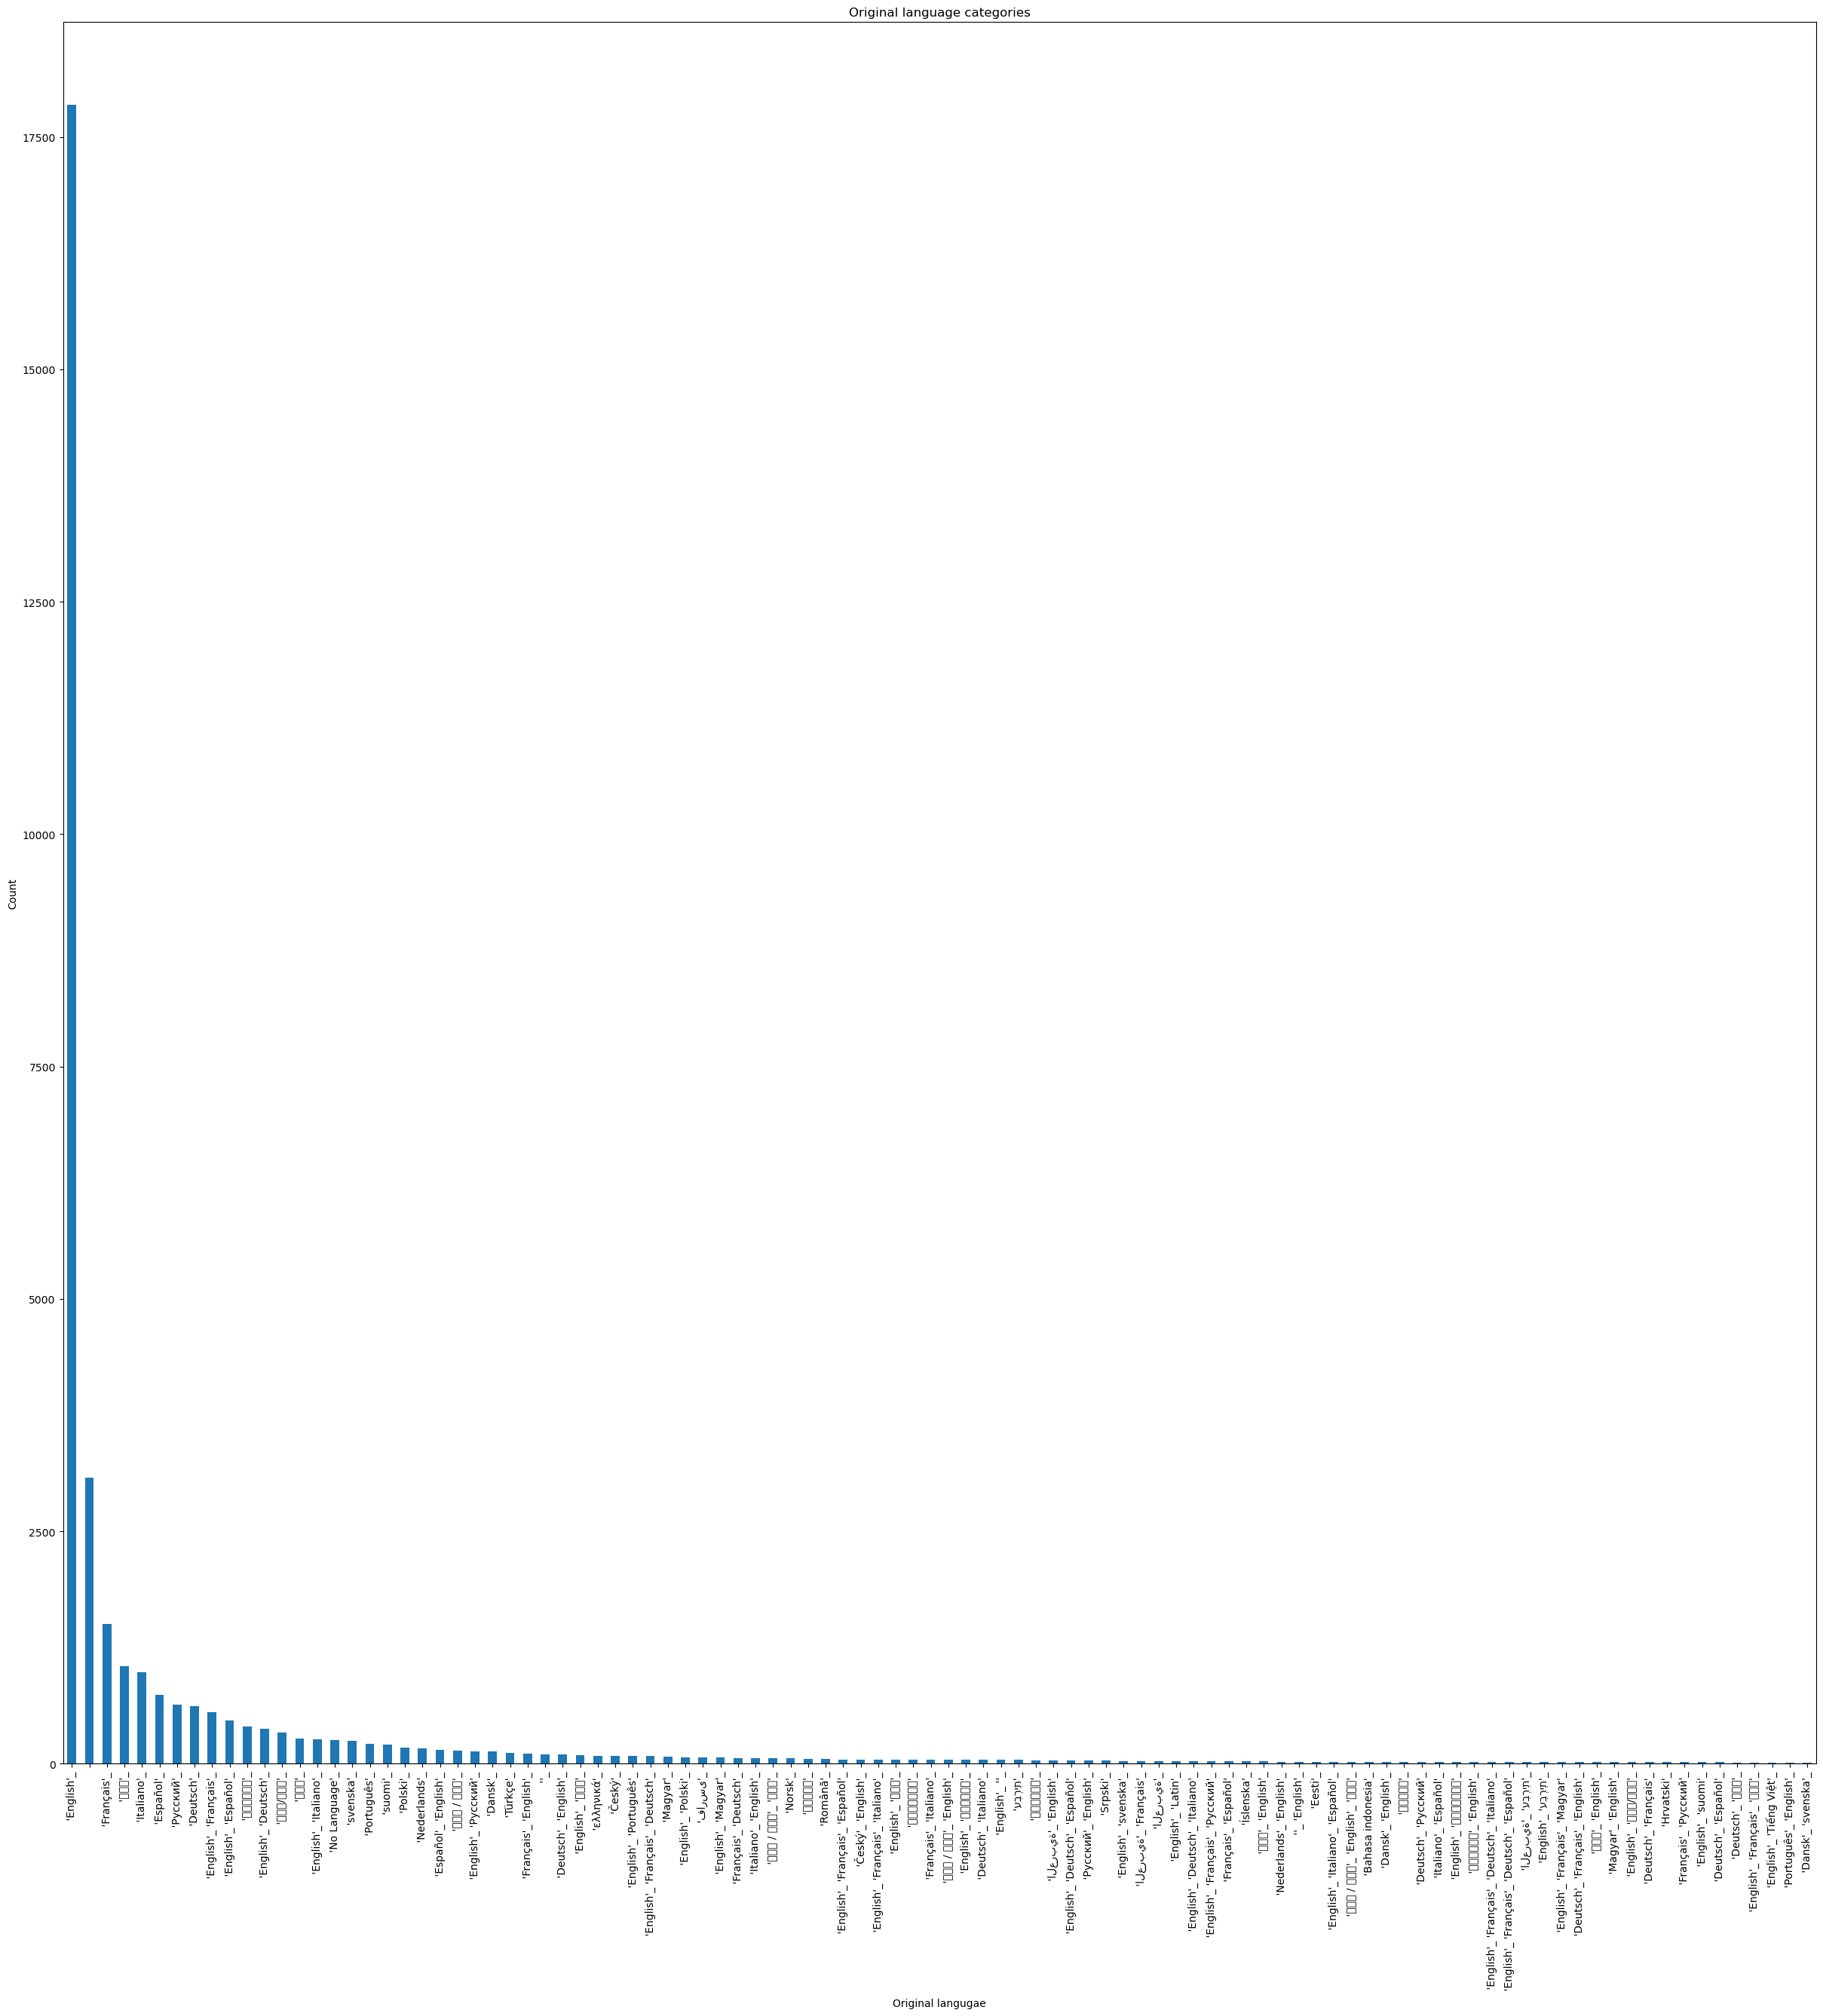

In [178]:
spoken_languages =movies['spoken_languages'].value_counts()[:100]
spoken_languages.plot(kind='bar',
                 title='Original language categories',
                 xlabel='Original langugae',
                 ylabel='Count',
                 figsize=(30,30))
plt.show()

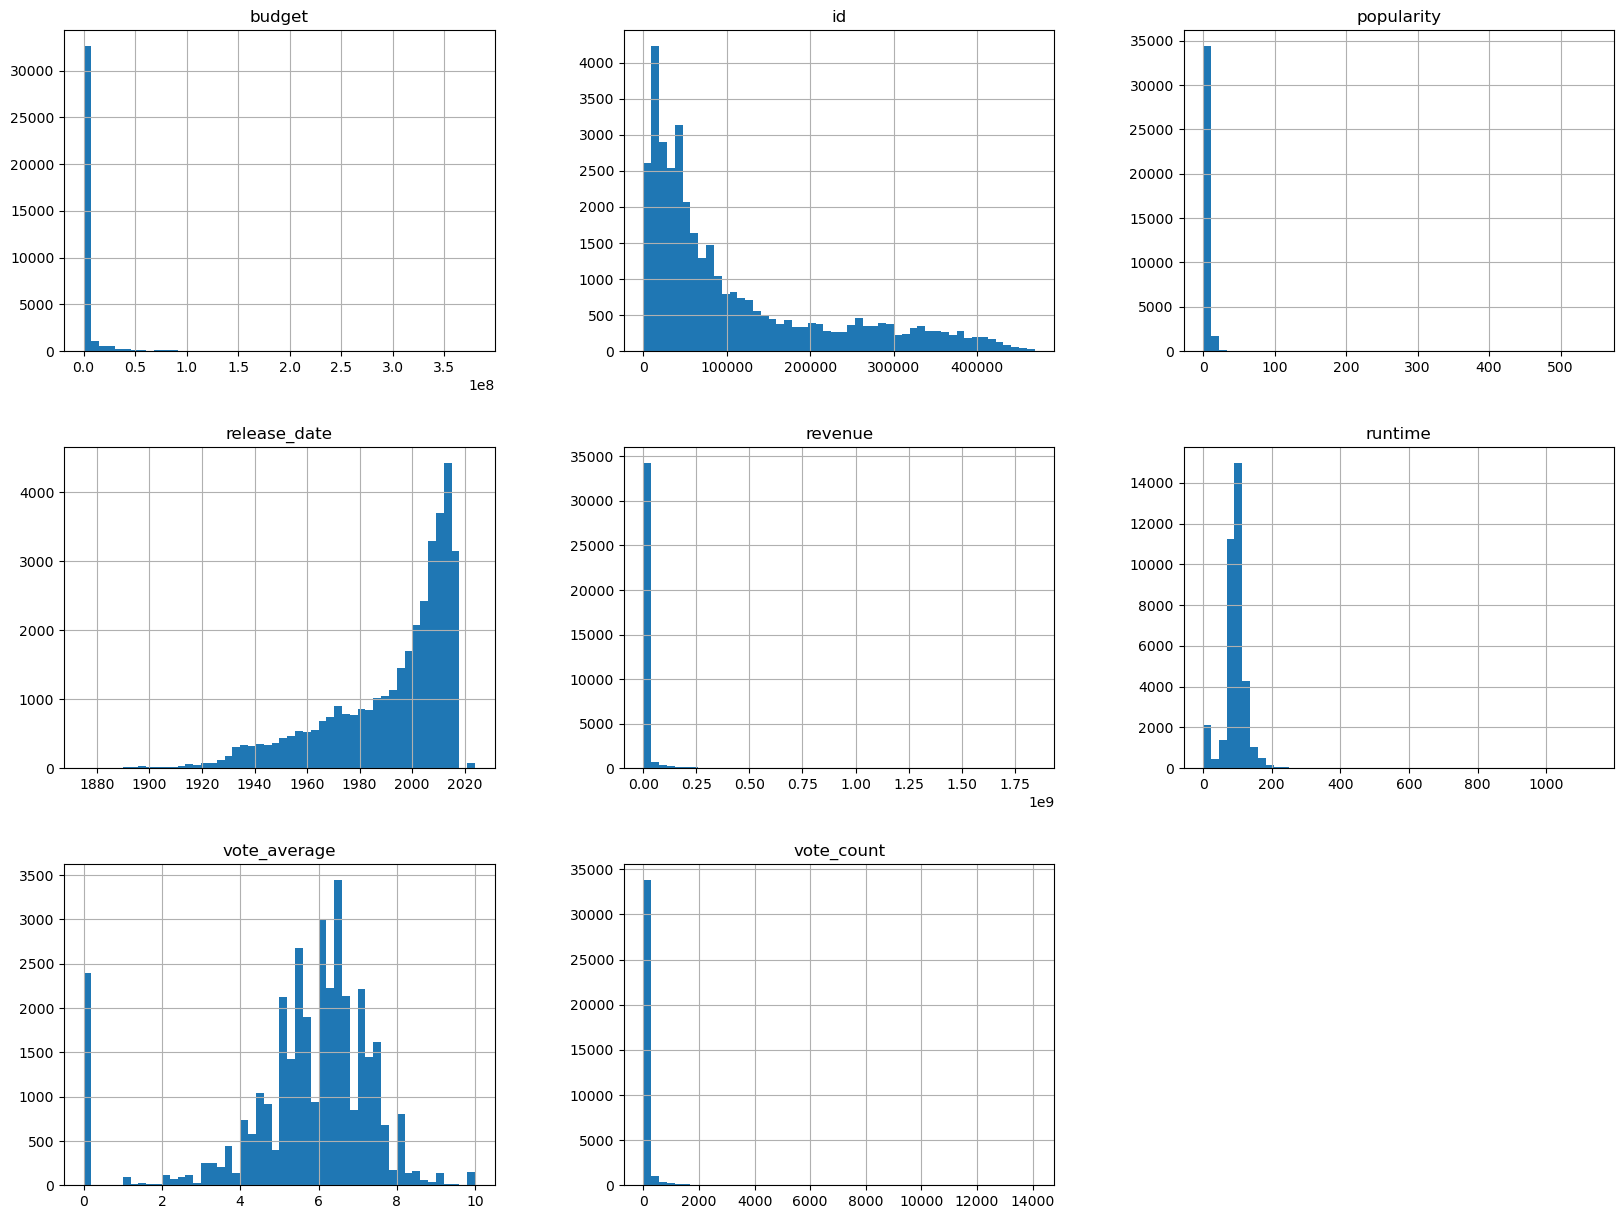

In [179]:
movies.hist(bins=50, figsize=(20,15))
plt.show()


In [180]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36361 entries, 0 to 36371
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   adult                  36361 non-null  bool          
 1   belongs_to_collection  36361 non-null  object        
 2   budget                 36361 non-null  float64       
 3   genres                 36361 non-null  object        
 4   homepage               36361 non-null  object        
 5   id                     36361 non-null  int32         
 6   imdb_id                36361 non-null  object        
 7   original_language      36361 non-null  object        
 8   original_title         36361 non-null  object        
 9   overview               36361 non-null  object        
 10  popularity             36361 non-null  float64       
 11  poster_path            36361 non-null  object        
 12  production_companies   36361 non-null  object        
 13  produc

In [181]:
movies_cat_attributes = ['adult','genres','original_language', 
                         'production_companies','production_countries', 
                         'spoken_languages','status','video']
movies_cat = movies.loc[:, movies_cat_attributes]
movies_cat.head()

,adult,genres,original_language,production_companies,production_countries,spoken_languages,status,video
0,True,'Horror'_ 'Thriller'_,fr,,'United States of America'_,'English'_,Released,False
1,True,'Horror'_,en,'Snowfall Films'_'Bay Bridge Productions Inc.'_'Wind Chill Films'_,'United States of America'_,'English'_,Released,False
2,True,'Documentary'_ 'Music'_,en,,,'English'_,Released,False
3,True,,it,'Metheus Film'_'Cairo Films'_,'Italy'_ 'Egypt'_,,Released,False
4,True,'Drama'_,fi,'Yellow Film & TV'_,'Finland'_,'suomi'_,Released,False


In [182]:
# creating dummy variables
from sklearn.preprocessing import OneHotEncoder
one_encoder = OneHotEncoder()
movies_cat_one_encoder = one_encoder.fit_transform(movies_cat)
movies_cat_one_encoder

<36361x25875 sparse matrix of type '<class 'numpy.float64'>'
	with 290888 stored elements in Compressed Sparse Row format>

In [183]:
movies_cat_one_encoder = movies_cat_one_encoder.toarray()

In [184]:
one_encoder.categories_

[array([ True]),
 array(['', " 'Action'_", " 'Action'_ 'Adventure'_", ...,
        " 'Western'_ 'Mystery'_", " 'Western'_ 'TV Movie'_",
        " 'Western'_ 'Thriller'_"], dtype=object),
 array(['104.0', '68.0', '82.0', 'ab', 'af', 'am', 'ar', 'bg', 'bm', 'bn',
        'bo', 'bs', 'ca', 'cn', 'cs', 'da', 'de', 'el', 'en', 'eo', 'es',
        'et', 'fa', 'fi', 'fr', 'gl', 'he', 'hi', 'hr', 'hu', 'id', 'is',
        'it', 'iu', 'ja', 'jv', 'ka', 'kk', 'kn', 'ko', 'ku', 'ky', 'la',
        'lb', 'lo', 'lt', 'lv', 'mk', 'ml', 'mn', 'mr', 'ms', 'mt', 'nan',
        'nb', 'ne', 'nl', 'no', 'pa', 'pl', 'ps', 'pt', 'qu', 'ro', 'ru',
        'sh', 'si', 'sk', 'sl', 'sm', 'sq', 'sr', 'sv', 'ta', 'te', 'tg',
        'th', 'tl', 'tr', 'uk', 'ur', 'uz', 'vi', 'wo', 'xx', 'zh'],
       dtype=object),
 array(['', '"\'A\' Production Committee"_', '"Ali\'n Productions"_', ...,
        "'영화사 집'_", "'이디오플랜'_", "'프로덕션M'_"], dtype=object),
 array(['',
        ' "Cote D\'Ivoire"_ \'Burkina Faso\'_ \'France\

In [185]:
# standardization of numerical features
from sklearn.preprocessing import StandardScaler
standardizer = StandardScaler()
standardized_num_attributes = standardizer.fit_transform(movies[num_attributes])
standardized_num_attributes

array([[-0.240579  , -0.34758025, -0.17592474, -0.89199227, -0.20894812],
       [-0.240579  , -0.33174041, -0.17592474, -0.78797199, -0.20894812],
       [-0.240579  , -0.47432653, -0.17592474,  1.24042344, -0.22113747],
       ...,
       [-0.240579  , -0.2061885 , -0.17592474,  0.82434232, -0.1906641 ],
       [-0.240579  , -0.46705205, -0.17592474, -1.88018491, -0.22113747],
       [-0.240579  , -0.26593786, -0.17592474,  0.09620038, -0.19675877]])

In [186]:
movies_clean = np.concatenate((movies_cat_one_encoder, standardized_num_attributes), axis=1)
movies_clean.shape

(36361, 25880)

In [187]:
movies_clean

array([[ 1.        ,  0.        ,  0.        , ..., -0.17592474,
        -0.89199227, -0.20894812],
       [ 1.        ,  0.        ,  0.        , ..., -0.17592474,
        -0.78797199, -0.20894812],
       [ 1.        ,  0.        ,  0.        , ..., -0.17592474,
         1.24042344, -0.22113747],
       ...,
       [ 1.        ,  0.        ,  0.        , ..., -0.17592474,
         0.82434232, -0.1906641 ],
       [ 1.        ,  0.        ,  0.        , ..., -0.17592474,
        -1.88018491, -0.22113747],
       [ 1.        ,  0.        ,  0.        , ..., -0.17592474,
         0.09620038, -0.19675877]])